# Titanic - Machine Learning
## Introduction

This is my try to the [Titanic ML competition](https://www.kaggle.com/c/titanic/overview). The competition is a Machine Learning binary classification problem, in which we have to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

First of all I have analyze the train dataset and deal with na values. Then, I have categorized some feature, passing from continuous to discrete data. I have done the same changes in the test dataset too.

In the second part, I have train some models with gridsearch to find out the best algorithm with the best hyperparameters from some choices. Thus, I have chosen the ones with gave me the best score and try to implement them. 

Finally, I have analyze the mistakes I make with the chosen model and wrote the csv model to submit to Kaggle.

## Inizialization
In this section I will import all the libraries and packages I need during this project, and then import the train and test dataset.
### Packages and libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Data

In [3]:
file_path_train = 'train.csv'
file_path_test = 'test.csv'

In [4]:
data_train = pd.read_csv(file_path_train, sep = ',', index_col = 'PassengerId')
data_test = pd.read_csv(file_path_test, sep = ',', index_col = 'PassengerId')
data = [data_train, data_test]

## Data analysis and preprocessing
In this section I will do some data analysis and preprocessing. First, I will explore the data. Then, I will deal with nan values that are present in some columns. After that, I will transform some features into categorical features.

In [5]:
print('Number of features in the train dataset : {} \nNumber of examples in the train dataset : {}'.format(data_train.shape[0], data_train.shape[1]))
print('Number of features in the test dataset : {} \nNumber of examples in the test dataset : {}'.format(data_test.shape[0], data_test.shape[1]))

Number of features in the train dataset : 891 
Number of examples in the train dataset : 11
Number of features in the test dataset : 418 
Number of examples in the test dataset : 10


We see that the test dataset has 10 columns instead of 11 because it miss the Survived feature.

In [6]:
for dataset in data:
    print(dataset.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [7]:
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


We have that 5 columns have an <code>object</code> dtype. Thus we have to work on it in some ways. Then, we see that some columns have some <code>nan</code> values. Finally, it could be a good idea to transform the float columns into int columns.

In [8]:
print(data_train.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


We can see that the numeric features have different scales and this could be a problem during the training of some methods. We will deal with this after.

### Dealing with Nan values

In [9]:
print('Train dataset')
print('Columns with NA values\n{}'.format(data_train.isnull().any()), '\nPercentage of NA values\n{}'.format(round(data_train.isnull().sum()/data_train.shape[0]*100, 1)))
print()
print('Test dataset')
print('Columns with NA values\n{}'.format(data_test.isnull().any()), '\nPercentage of NA values\n{}'.format(round(data_test.isnull().sum()/data_test.shape[0]*100, 1)))

Train dataset
Columns with NA values
Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool 
Percentage of NA values
Survived     0.0
Pclass       0.0
Name         0.0
Sex          0.0
Age         19.9
SibSp        0.0
Parch        0.0
Ticket       0.0
Fare         0.0
Cabin       77.1
Embarked     0.2
dtype: float64

Test dataset
Columns with NA values
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare         True
Cabin        True
Embarked    False
dtype: bool 
Percentage of NA values
Pclass       0.0
Name         0.0
Sex          0.0
Age         20.6
SibSp        0.0
Parch        0.0
Ticket       0.0
Fare         0.2
Cabin       78.2
Embarked     0.0
dtype: float64


We note that we have some columns that have <code>nan</code> values both in train and test dataset, as **Age** and **Cabin**, while other have <code>nan</code> values only in one dataset, as **Embarked** and **Fare**. We note also that there is an high percentage of <code>nan</code> values in the **Cabin** feature, so I would just drop it. For the **Age** column, I will try to look for the distribution and substite the missing values with some values taken from the same distribution. While, since the <code>nan</code> values percentage in the **Embarked** and **Fare** columns is very low, I will substitute them with the more common value and the median value.

#### Age

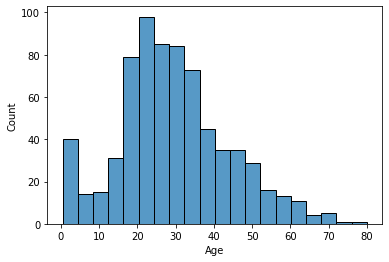

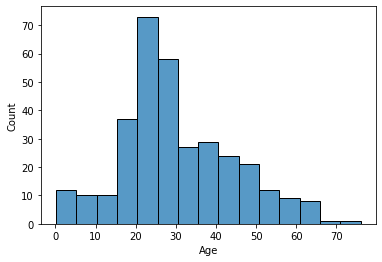

In [10]:
# plot the distribution of the age data
for dataset in data:
    fig, ax = plt.subplots(1, 1)
    hist_plot = sns.histplot(dataset['Age'], ax = ax)

We can see that the age is similar to a skewed normal distribution. I used <code>skewnorm.fit</code> to obtain an estimation of the parameters of the distribution, and <code>skewnorm.rvs</code> to generate a number of points from this distribution. The number of points is equivalent to the number of <code>nan</code> values in the age column.

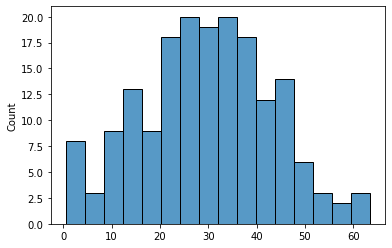

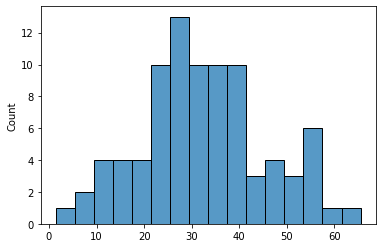

In [11]:
for dataset in data:
    a, loc, scale = skewnorm.fit(dataset.loc[dataset['Age'].notnull(), 'Age'])
    new_age = skewnorm.rvs(a, loc = loc, scale = scale,  size = dataset['Age'].isnull().sum(), random_state = 3)
    new_age[new_age<0] = 1
    new_age = pd.Series(new_age)
    new_age = new_age.astype(int)
    new_age = new_age + 0.5
    new_age.index = dataset[dataset['Age'].isnull()].index
    dataset.loc[dataset.Age.isnull(), 'Age'] = new_age
    fig, ax = plt.subplots(1, 1)
    sns.histplot(new_age, bins = 16, ax = ax)

#### Cabin

Since we have too much <code>nan</code> values in the 'Cabin' column, I will just drop the column.

In [12]:
for dataset in data:
    dataset.drop('Cabin', axis = 1, inplace = True)

#### Embarked

There are only 2 <code>nan</code> values in the 'Embarked' column of the train dataset, thus it seems fair to me to replace these values with the most common one within this feature.

In [13]:
data_train['Embarked'].fillna(data_train['Embarked'].mode()[0], inplace = True)

#### Fare
There is only one <code>nan</code> value in the 'Fare' column of the test set. Thus, I will replace it with the median of this feature.

In [14]:
data_test['Fare'].fillna(data_test['Fare'].median(), inplace = True)

#### Conclusion
Let's see if there are still some missing values.

In [15]:
print('Are there some missing values in the train dataset: {}'.format(data_train.isnull().any().any()))
print('Are there some missing values in the test dataset: {}'.format(data_test.isnull().any().any()))

Are there some missing values in the train dataset: False
Are there some missing values in the test dataset: False


### Categorical to numerical and scaled
As we said earlier, there are some features which are categorical. In this subsection I will transform the categories of the **Embarked** nad **Sex** columns into numeric categories.

Then, I will create some new features categorizing the **Age** and **Fare** columns.

#### Embarked

The 'Embarked' column has just three values. Thus, we replace the original values with 0, 1 and 2.

In [16]:
values_embarked = {'S' : 0, 'C' : 1, 'Q' : 2}
def change_embarked(x):
    return values_embarked[x]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].apply(change_embarked)

#### Sex

In [17]:
genders = {'male' : 0, 'female' : 1}

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

#### Age

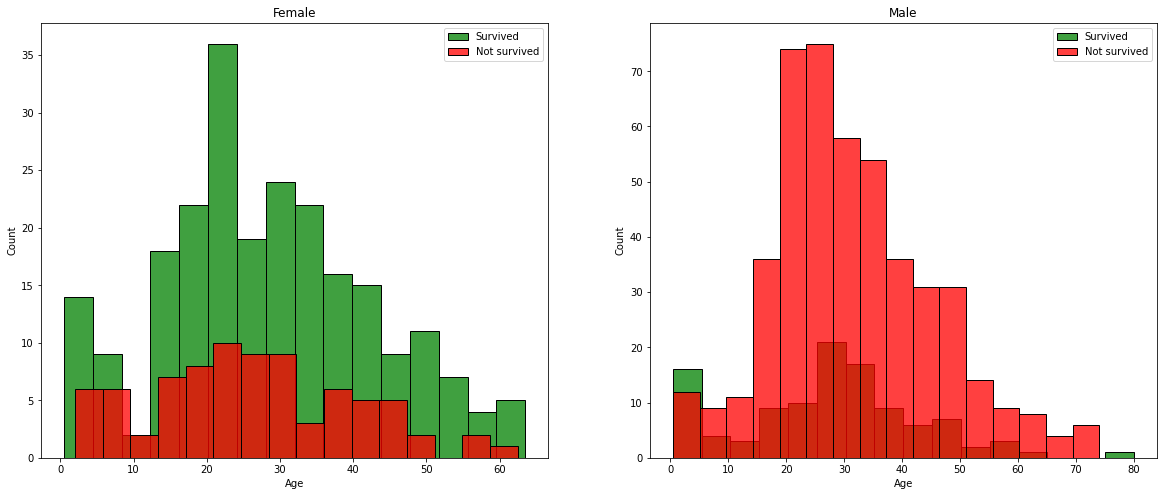

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))

bins = 16
women = data_train.loc[data_train['Sex'] == 1]
men = data_train.loc[data_train['Sex'] == 0]

_ = sns.histplot(women.loc[women['Survived'] == 1, 'Age'], label = 'Survived', ax = ax[0], kde = False, color = 'g', bins = bins)
_ = sns.histplot(women.loc[women['Survived'] == 0, 'Age'], label = 'Not survived', ax = ax[0], kde = False, color = 'r', bins = bins)
_.legend()
_.set_title('Female')

_ = sns.histplot(men.loc[men['Survived'] == 1, 'Age'], label = 'Survived', ax = ax[1], kde = False, color = 'g', bins = bins)
_ = sns.histplot(men.loc[men['Survived'] == 0, 'Age'], label = 'Not survived', ax = ax[1], kde = False, color = 'r', bins = bins)
_.legend()
_.set_title('Male');

We can see that there are some age categories - both in male or female - where people survive more or less. So it could be a good idea to categorize them.

In [19]:
for dataset in data:
    dataset['Age_cat'] = pd.qcut(dataset['Age'], 8, labels = False)
    dataset['Age_cat'].value_counts()

In [20]:
print('Number of elements in each class given the survived label \n{}'.format(data_train.groupby(by = ['Survived', 'Age_cat']).size()))

Number of elements in each class given the survived label 
Survived  Age_cat
0         0          54
          1          74
          2          70
          3          71
          4          74
          5          63
          6          78
          7          65
1         0          60
          1          38
          2          41
          3          40
          4          49
          5          37
          6          36
          7          41
dtype: int64


We note that we don't have unbalanced data here.

#### Fare

In [21]:
# Round the dataset to integers
for dataset in data:
    dataset['Fare'] = dataset['Fare'].astype(int)

Text(0.5, 1.0, 'Fare')

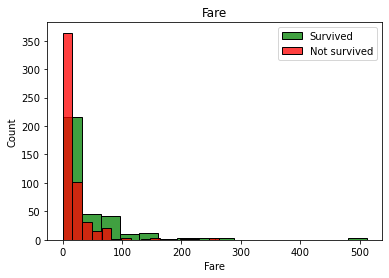

In [22]:
fig = plt.plot(figsize = (20, 8))

bins = 16
_ = sns.histplot(data_train.loc[data_train['Survived'] == 1, 'Fare'], label = 'Survived', kde = False, color = 'g', bins = bins)
_ = sns.histplot(data_train.loc[data_train['Survived'] == 0, 'Fare'], label = 'Not survived', color = 'r', bins = bins)
_.legend()
_.set_title('Fare')


In [23]:
for dataset in data:
    dataset['Fare_cat'] = pd.qcut(dataset['Fare'], 4, labels = False)
    dataset['Fare_cat'].value_counts()

In [24]:
print('Number of elements in each class given the survived label \n{}'.format(data_train.groupby(by = ['Survived', 'Fare_cat']).size()))

Number of elements in each class given the survived label 
Survived  Fare_cat
0         0           189
          1           154
          2           121
          3            85
1         0            52
          1            62
          2           102
          3           126
dtype: int64


#### Name
In this subsection we will create a new column named **Title** from the **Name** column, taking only the title of each person.

In [25]:
# A look at the most common titles

all_names = {}
for name in data_train['Name']:
    name = name.split(' ')
    for word in name:
        if word in all_names.keys():
            all_names[word] += 1
        else:
            all_names[word] = 1
all_names = sorted(all_names.items(), key = lambda x : -x[1])
print(all_names[:8])

[('Mr.', 517), ('Miss.', 182), ('Mrs.', 125), ('William', 62), ('John', 44), ('Master.', 40), ('Henry', 33), ('James', 24)]


In [26]:
titles = {'Mrs' : 3, 'Mr' : 1, 'Miss' : 2, 'Master' : 4, 'Other' : 5}

In [27]:
def replacing_titles(name):
    flag = False
    for title in titles.keys():
        if title in name:
            flag = True
            return title
    if flag == False:
        return 'Other'
    
for dataset in data:
    dataset['Title'] = dataset['Name'].map(replacing_titles)
    dataset['Title'] = dataset['Title'].map(titles)

In [28]:
print('Number of values for each title \n{}'.format(data_train['Title'].value_counts()))

Number of values for each title 
1    518
2    180
3    129
4     40
5     24
Name: Title, dtype: int64


### Train and validation set

In this section I will select the features I want the algorithms use. I am not taking the **Age** and **Fare** columns but their fees categorized ones.

In [29]:
features = ['Pclass', 'Sex', 'Age_cat', 'SibSp', 'Parch', 'Fare_cat', 'Embarked', 'Title']

In [30]:
X_train_val = data_train.loc[:, features].copy()
print('Shape of X_train_val: {}'.format(X_train_val.shape))

Shape of X_train_val: (891, 8)


In [31]:
y_train_val = data_train.loc[:, 'Survived'].copy()
print('Shape of y_train_val: {}'.format(y_train_val.shape))

Shape of y_train_val: (891,)


In [32]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                 train_size = 0.8, random_state = 123)
print('Shape of X_train: {}'.format(X_train.shape), '\tShape of y_train: {}'.format(y_train.shape))
print('Shape of X_val: {}'.format(X_val.shape), '\tShape of y_val: {}'.format(y_val.shape))

Shape of X_train: (712, 8) 	Shape of y_train: (712,)
Shape of X_val: (179, 8) 	Shape of y_val: (179,)


## Processing with Gridsearch
In this section I will use diferent algorithms implemented with gridsearch to try different hyperparameters and find the best ones. The algorithms I will use are:
- Perceptron
- Logistic Regression
- SVM
- Decision Tree
- Random Forest
- K-nn (not a gridsearch but I will try different ks)

#### GridSearch Perceptron

In [33]:
parameters = {'alpha' : [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2], 
             'max_iter' : [200, 500, 1000, 2000], 
             'n_jobs' : [1]}
ptr = Perceptron()
gs_ptr = GridSearchCV(ptr, param_grid = parameters, cv = 2)

gs_ptr.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=Perceptron(),
             param_grid={'alpha': [0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 2],
                         'max_iter': [200, 500, 1000, 2000], 'n_jobs': [1]})

In [34]:
print('The best accuracy score is: {}\nThe best parameters are: {}'.format(gs_ptr.best_score_, gs_ptr.best_params_))


The best accuracy score is: 0.5870786516853932
The best parameters are: {'alpha': 0, 'max_iter': 200, 'n_jobs': 1}


#### GridSearch Logistic regression

In [35]:
parameters = {'penalty' : ['l2'],
             'C' : [0.001, 0.01, 0.1, 1]}

lr = LogisticRegression()
gs_lr = GridSearchCV(lr, param_grid = parameters, cv = 4)

gs_lr.fit(X_train_val, y_train_val)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l2']})

In [36]:
print('The best accuracy score is: {}\nThe best parameters are: {}'.format(gs_lr.best_score_, gs_lr.best_params_))

The best accuracy score is: 0.8091998949622268
The best parameters are: {'C': 1, 'penalty': 'l2'}


#### Gridsearch SVM

In [37]:
parameters = {'kernel' : ('linear', 'rbf'),
            'C' : [0.1, 1, 10, 100]}
svc = SVC()
gs_svc = GridSearchCV(svc, param_grid=parameters, cv = 5)

gs_svc.fit(X_train_val, y_train_val)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ('linear', 'rbf')})

In [38]:
print('The best score is: {}\nThe best parameters are: {}'.format(gs_svc.best_score_, gs_svc.best_params_))

The best score is: 0.8293704098926622
The best parameters are: {'C': 10, 'kernel': 'rbf'}


#### Gridsearch Decision tree

In [39]:
parameters = {'criterion' : ['gini', 'entropy'],
             'max_depth' : [3, 5, 10, 15, None],
             'random_state' : [90, 123, 42, 56, 45]}

dt = DecisionTreeClassifier()

gs_dt = GridSearchCV(dt, param_grid=parameters, cv = 4)

gs_dt.fit(X_train_val, y_train_val)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15, None],
                         'random_state': [90, 123, 42, 56, 45]})

In [40]:
print('The best score is: {}\nThe best parameters are: {}'.format(gs_dt.best_score_, gs_dt.best_params_))

The best score is: 0.8204258069728922
The best parameters are: {'criterion': 'gini', 'max_depth': 3, 'random_state': 90}


#### Gridsearch Random forest

In [41]:
parameters = {'n_estimators' : [50, 100, 150],
             'criterion' : ['gini', 'entropy'], 
             'max_depth' : [3, 5, 10],
             'random_state' : [90, 123, 42, 56, 45]}

rf = RandomForestClassifier()

gs_rf = GridSearchCV(rf, param_grid = parameters, cv = 4)

gs_rf.fit(X_train_val, y_train_val)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 150],
                         'random_state': [90, 123, 42, 56, 45]})

In [42]:
print('The best score is: {}\nThe best parameters are: {}'.format(gs_rf.best_params_, gs_rf.best_score_))

The best score is: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100, 'random_state': 90}
The best parameters are: 0.828288490284006


#### K-nn

In [43]:
accuracyscore_values_train = []
accuracyscore_values_val = []

f1score_values_train = []
f1score_values_val = []

n_neighbours = range(1, 500)
for k in n_neighbours:
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1, algorithm = 'brute')
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_val_pred = knn.predict(X_val)
    f1score_values_train.append(f1_score(y_train, y_train_pred,average = 'macro'))
    f1score_values_val.append(f1_score(y_val, y_val_pred, average = 'macro'))
    accuracyscore_values_train.append(accuracy_score(y_train, y_train_pred))
    accuracyscore_values_val.append(accuracy_score(y_val, y_val_pred))
    

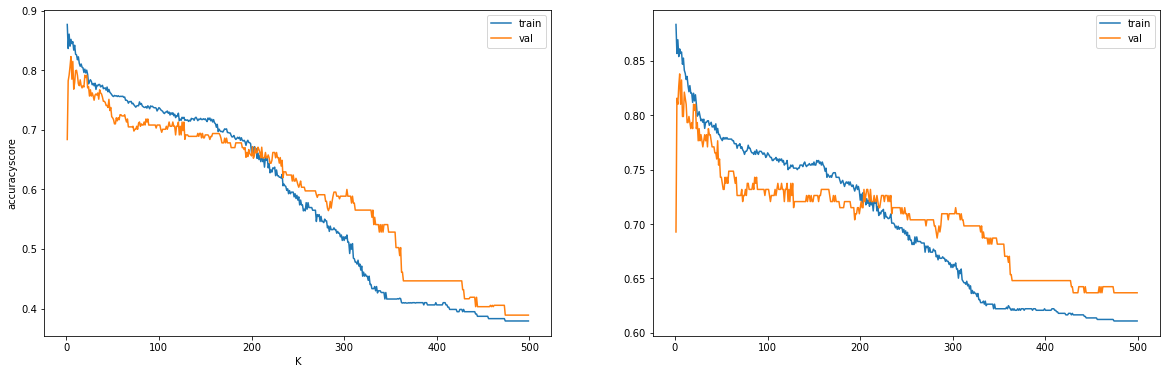

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
lineplot_train = sns.lineplot(x = n_neighbours, y = f1score_values_train, label="train", ax = ax[0])
lineplot_val = sns.lineplot(x = n_neighbours, y = f1score_values_val, label="val", ax = ax[0])
_ = ax[0].set_xlabel('K')
_ = ax[0].set_ylabel('f1score')


lineplot_train = sns.lineplot(x = n_neighbours, y = accuracyscore_values_train, label="train", ax = ax[1])
lineplot_val = sns.lineplot(x = n_neighbours, y = accuracyscore_values_val, label="val", ax = ax[1])
_ = ax[0].set_xlabel('K')
_ = ax[0].set_ylabel('accuracyscore')




In [45]:
print('The best f1-score obtained is: {}\nIt is obtained when k = {}'.format(np.max(f1score_values_val), np.where(f1score_values_val == np.max(f1score_values_val))[0]))
print('The best accuracy-score obtained is: {}\nIt is obtained when k = {}'.format(np.max(accuracyscore_values_val), np.where(accuracyscore_values_val == np.max(accuracyscore_values_val))[0]))

The best f1-score obtained is: 0.8230562088829805
It is obtained when k = [4]
The best accuracy-score obtained is: 0.8379888268156425
It is obtained when k = [4]


## Processing with the best algorithms

As a rule to proceed, I will take the three algorithms with the best <code>accuracy_score</code>. In compliance with this rule, we'll look into:
- SVM
- Random Forest
- K-nn

Now I will use the train dataset division I did before, where I took a subset to evaluate the model. I have less examples to train the model, but a good vision on what could be the algorithm to use for the final evaluation.

### SVM

In [46]:
svm = SVC(C = 1, kernel = 'rbf')
svm.fit(X_train, y_train)

SVC(C=1)

In [47]:
y_train_pred = svm.predict(X_train)
y_val_pred = svm.predict(X_val)

In [48]:
accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_val = accuracy_score(y_val, y_val_pred)

print('The accuracy score on the train set is: {}\nThe accuracy score on the validation set is: {}'.format(accuracy_score_train, accuracy_score_val))

f1score_train = f1_score(y_train, y_train_pred)
f1score_val = f1_score(y_val, y_val_pred)

print('The f1 score on the train set is: {}\nThe f1 score on the validation set is: {}'.format(f1score_train, f1score_val))

The accuracy score on the train set is: 0.8230337078651685
The accuracy score on the validation set is: 0.8379888268156425
The f1 score on the train set is: 0.7622641509433964
The f1 score on the validation set is: 0.7716535433070866


In [49]:
svm.n_support_

array([181, 169])

### Random Forest

In [50]:
rf = RandomForestClassifier(criterion ='entropy', max_depth = 10, n_estimators = 100, random_state = 123)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=123)

In [51]:
y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)

In [52]:
accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_val = accuracy_score(y_val, y_val_pred)

print('The accuracy score on the train set is: {}\nThe accuracy score on the validation set is: {}'.format(accuracy_score_train, accuracy_score_val))

f1score_train = f1_score(y_train, y_train_pred)
f1score_val = f1_score(y_val, y_val_pred)

print('The f1 score on the train set is: {}\nThe f1 score on the validation set is: {}'.format(f1score_train, f1score_val))

The accuracy score on the train set is: 0.9058988764044944
The accuracy score on the validation set is: 0.8044692737430168
The f1 score on the train set is: 0.872865275142315
The f1 score on the validation set is: 0.7286821705426355


We can see that our model is overfitting a little since the score on the train set is much higher than the one on the validation set. Now I will try to select only the features that are very important for the algorithm.

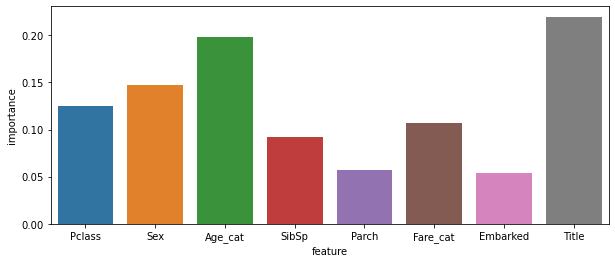

In [53]:
importances = pd.DataFrame(data ={'feature' : features, 'importance' : rf.feature_importances_})
fig, ax = plt.subplots(1, 1, figsize = (10, 4))
_ = sns.barplot(x = importances['feature'], y = importances['importance'])

We can see that the **Parch** and **Embarked** columns have little importance to the split in each decision tree of the random forest. Thus, I will try to drop them and re-train the model.

In [54]:
new_features = ['Pclass', 'Sex', 'Age_cat', 'SibSp', 'Fare_cat', 'Title']
X_train_val = data_train.loc[:, new_features].copy()

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                 train_size = 0.8, random_state = 123)
print('X_train shape: {} \ty_train shape: {}'.format(X_train.shape, y_train.shape))
print('X_val shape: {} \t\ty_val shape: {}'.format(X_val.shape, y_val.shape))


X_train shape: (712, 6) 	y_train shape: (712,)
X_val shape: (179, 6) 		y_val shape: (179,)


In [55]:
rf = RandomForestClassifier(criterion ='entropy', max_depth = 10, n_estimators = 100, random_state = 1)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=1)

In [56]:
y_train_pred_rf = rf.predict(X_train)
y_val_pred_rf = rf.predict(X_val)

In [57]:
accuracy_score_train = accuracy_score(y_train, y_train_pred_rf)
accuracy_score_val = accuracy_score(y_val, y_val_pred_rf)

print('The accuracy score on the train set is: {}\nThe accuracy score on the validation set is: {}'.format(accuracy_score_train, accuracy_score_val))

f1score_train = f1_score(y_train, y_train_pred_rf)
f1score_val = f1_score(y_val, y_val_pred_rf)

print('The f1 score on the train set is: {}\nThe f1 score on the validation set is: {}'.format(f1score_train, f1score_val))

The accuracy score on the train set is: 0.8918539325842697
The accuracy score on the validation set is: 0.8268156424581006
The f1 score on the train set is: 0.8516377649325626
The f1 score on the validation set is: 0.7559055118110236


The model seems a little better now. We have reduced the gap between the scores on the train and validation set, improving the score on the validation set.

### Knn

In [58]:
# To return to the previous dataset - I have modified the chosen features during random forest
X_train_val = data_train.loc[:, features].copy()
print('Shape of X_train_val: {}'.format(X_train_val.shape))
y_train_val = data_train.loc[:, 'Survived'].copy()
print('Shape of y_train_val: {}'.format(y_train_val.shape))

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                 train_size = 0.8, random_state = 123)
print('Shape of X_train: {}'.format(X_train.shape), '\tShape of y_train: {}'.format(y_train.shape))
print('Shape of X_val: {}'.format(X_val.shape), '\tShape of y_val: {}'.format(y_val.shape))

Shape of X_train_val: (891, 8)
Shape of y_train_val: (891,)
Shape of X_train: (712, 8) 	Shape of y_train: (712,)
Shape of X_val: (179, 8) 	Shape of y_val: (179,)


In [59]:
knn = KNeighborsClassifier(n_neighbors = 4, n_jobs = -1, algorithm = 'brute')
knn.fit(X_train, y_train)
y_train_pred_knn = knn.predict(X_train)
y_val_pred_knn = knn.predict(X_val)

In [60]:
accuracy_score_train = accuracy_score(y_train, y_train_pred_knn)
accuracy_score_val = accuracy_score(y_val, y_val_pred_knn)

print('The accuracy score on the train set is: {}\nThe accuracy score on the validation set is: {}'.format(accuracy_score_train, accuracy_score_val))

f1score_train = f1_score(y_train, y_train_pred_knn)
f1score_val = f1_score(y_val, y_val_pred_knn)

print('The f1 score on the train set is: {}\nThe f1 score on the validation set is: {}'.format(f1score_train, f1score_val))

The accuracy score on the train set is: 0.8539325842696629
The accuracy score on the validation set is: 0.8268156424581006
The f1 score on the train set is: 0.7944664031620554
The f1 score on the validation set is: 0.7438016528925621


## Error Analysis
Based on the result obtained, I can say that the random forest is the algorithm which behaves the best. However, there are not big differences between these algorithms, and could be that if we split the <code>train_val</code> dataset in a different manner, we end up to have values slightly different which could make another algorithm better than random forest. Now let's see which kind of error we make on both the random forest and K-nn models.

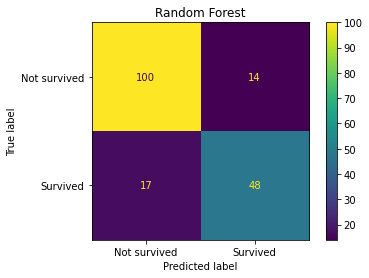

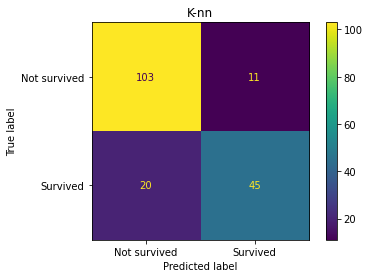

In [61]:

cm = confusion_matrix(y_val, y_val_pred_rf, labels = [0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = {0 : 'Not survived', 1 : 'Survived'}.values())
_ = disp.plot()
plt.title('Random Forest')
plt.show()

cm = confusion_matrix(y_val, y_val_pred_knn, labels = [0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = {0 : 'Not survived', 1 : 'Survived'}.values())
disp.plot()
plt.title('K-nn')
plt.show()

While the random forest commits as much type 1 error as type 2, we have that the K-nn method predicts in a worse way the people who actually survived.

## Random Forest and K-nn on the test set
### Random Forest

In [62]:
# Taking the data
X_test = data_test.loc[:, new_features].copy()
X_train = data_train.loc[:, new_features].copy()
y_train = data_train.loc[:, 'Survived'].copy()


In [63]:
# Fit the model
rf = RandomForestClassifier(criterion ='entropy', max_depth = 10, n_estimators = 100, random_state = 123)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=123)

In [64]:
# Predict the Survived values
y_test_pred_rf = rf.predict(X_test)

In [65]:
# Write the file
from pathlib import Path  
filepath = Path('test_result_rf.csv')  

In [66]:
result = pd.Series(y_test_pred_rf, index = data_test.index, name = 'Survived')
result.to_csv(filepath)

### K-nn

In [67]:
# Taking the data
X_test = data_test.loc[:, features].copy()
X_train = data_train.loc[:, features].copy()
y_train = data_train.loc[:, 'Survived'].copy()

In [71]:
# Train the model
knn = KNeighborsClassifier(n_neighbors = 4, n_jobs = -1, algorithm = 'brute')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=4)

In [72]:
# Predict the Survived values
y_test_pred_knn = knn.predict(X_test)

In [73]:
filepath = Path('test_result_knn.csv') 
result = pd.Series(y_test_pred_rf, index = data_test.index, name = 'Survived')
result.to_csv(filepath)

## Conclusion
It has been challenging. I know this results could be better, and that I could have made some mistakes during the journey. I enjoyed working with this data. There a lot of different things I could have tried, but for now this notebook is complete. Hope you have enjoyed my work too.